In [2]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [3]:
save_dir = "/cluster/home/kamara/conceptx"

In [4]:
folder_path = os.path.join(save_dir, f"results-no-sample/faithfulness")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
            df["batch"] = parts[2]
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "aspect": "_a"}).fillna("")
df_all


parts:  ['faithfulness', 'batch', '0', 'alpaca', 'mistral-7b-it', 'random', '0.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/alpaca/random/seed_0/faithfulness_batch_0_alpaca_mistral-7b-it_random_0.csv
parts:  ['faithfulness', 'batch', '0', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_0_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batch', '1', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_1_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batch', '2', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_2_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batc

parts:  ['faithfulness', 'batch', '4', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_4_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batch', '3', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_3_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batch', '6', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_6_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batch', '7', 'sst2', 'mistral-7b-it', 'random', '1.csv']
full_path: /cluster/home/kamara/conceptx/results-no-sample/faithfulness/mistral-7b-it/sst2/random/seed_1/faithfulness_batch_7_sst2_mistral-7b-it_random_1.csv
parts:  ['faithfulness', 'batch', '8

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,batch,dataset,model,explainer,baseline,seed
0,47316,What are the four rules for exponents?,0.152412,0.152412,0.111574,0.609187,0.609187,0.715333,0.816140,0.816140,0.788487,0.648493,0.997406,0,alpaca,mistral-7b-it,random,None,0
1,27527,How does the temperature affect the speed of s...,0.040279,0.040279,0.195498,0.204751,0.413970,0.408093,0.571576,0.632348,0.656475,0.699775,0.954040,0,alpaca,mistral-7b-it,random,None,0
2,19941,Explain the process of mitosis in 200 words.,0.148821,0.148821,0.048133,0.176100,0.027254,0.119231,0.119231,0.194224,0.068075,0.251993,0.997829,0,alpaca,mistral-7b-it,random,None,0
3,24644,Describe the events leading up to World War I.,0.029032,0.029032,0.063842,0.033431,0.231433,0.365337,0.524521,0.526389,0.864960,0.861101,1.000000,0,alpaca,mistral-7b-it,random,None,0
4,423,How does the human brain remember information?,0.070169,0.070169,0.599533,0.573745,0.573745,0.577218,0.750831,0.750831,0.809021,0.806243,0.860898,0,alpaca,mistral-7b-it,random,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266,51177,Compare the natural selection and artificial s...,-0.029208,-0.029208,0.205108,0.440282,0.440282,0.353239,0.812950,0.812950,0.893526,0.869670,1.000000,9,alpaca,gemma-3-4b,tokenshap,None,1
23267,21619,Identify at least 3 symptoms of depression.,0.000296,0.000296,0.305424,0.541747,0.541747,0.764593,0.677255,0.677255,0.635926,0.703525,1.000000,9,alpaca,gemma-3-4b,tokenshap,None,1
23268,28299,Generate a valid JSON schema for a customer pr...,-0.023220,-0.023220,0.509194,0.614471,0.541380,0.637523,0.694009,1.000000,1.000000,1.000000,1.000000,9,alpaca,gemma-3-4b,tokenshap,None,1
23269,5812,"Calculate the mean of the numbers 2,3,7,1",0.043232,0.026345,0.100686,0.081532,0.110258,0.760255,0.279519,0.465707,0.822896,0.814373,0.821913,9,alpaca,gemma-3-4b,tokenshap,None,1


In [5]:
### Size of dataset for model
model_list = ["llama-3-3b", "gemma-3-4b", "gpt4o-mini", "mistral-7b-it"]
df = df_all[df_all["model"].isin(model_list)]
df_stats = df.groupby(["dataset", "model", "seed", "explainer"])["id"].nunique().reset_index()

In [6]:
dataset = "alpaca"
df_stats[df_stats['dataset']==dataset]

,dataset,model,seed,explainer,id
0,alpaca,gemma-3-4b,0,conceptshap,930
1,alpaca,gemma-3-4b,0,conceptx,900
2,alpaca,gemma-3-4b,0,random,978
3,alpaca,gemma-3-4b,0,tokenshap,962
4,alpaca,gemma-3-4b,1,conceptshap,998
5,alpaca,gemma-3-4b,1,conceptx,969
6,alpaca,gemma-3-4b,1,random,1000
7,alpaca,gemma-3-4b,1,tokenshap,969
8,alpaca,gemma-3-4b,2,conceptshap,996
9,alpaca,gemma-3-4b,2,conceptx,966


In [12]:
df = df_all[df_all["model"].isin(model_list)]
df_stats2 = df.groupby(["dataset", "batch", "model", "explainer"])["id"].nunique().reset_index()
df_explore = df_stats2[df_stats2['dataset']==dataset]
df_explore

,dataset,batch,model,explainer,id
315,sst2,0,gemma-3-4b,conceptshap,97
316,sst2,0,gemma-3-4b,conceptx,91
317,sst2,0,gemma-3-4b,conceptx_a,93
318,sst2,0,gemma-3-4b,random,100
319,sst2,0,gemma-3-4b,tokenshap,100
...,...,...,...,...,...
460,sst2,9,llama-3-3b,conceptshap,98
461,sst2,9,llama-3-3b,conceptx,94
462,sst2,9,llama-3-3b,conceptx_a,95
463,sst2,9,llama-3-3b,random,100


In [13]:
for i in range(10):
    print(df_explore[df_explore["batch"]==str(i)])

    dataset batch       model    explainer   id
315    sst2     0  gemma-3-4b  conceptshap   97
316    sst2     0  gemma-3-4b     conceptx   91
317    sst2     0  gemma-3-4b   conceptx_a   93
318    sst2     0  gemma-3-4b       random  100
319    sst2     0  gemma-3-4b    tokenshap  100
320    sst2     0  gpt4o-mini  conceptshap   97
321    sst2     0  gpt4o-mini     conceptx   93
322    sst2     0  gpt4o-mini   conceptx_a   92
323    sst2     0  gpt4o-mini       random  100
324    sst2     0  gpt4o-mini    tokenshap  100
325    sst2     0  llama-3-3b  conceptshap   97
326    sst2     0  llama-3-3b     conceptx   94
327    sst2     0  llama-3-3b   conceptx_a   92
328    sst2     0  llama-3-3b       random  100
329    sst2     0  llama-3-3b    tokenshap  100
    dataset batch       model    explainer   id
330    sst2     1  gemma-3-4b  conceptshap   99
331    sst2     1  gemma-3-4b     conceptx   94
332    sst2     1  gemma-3-4b   conceptx_a   96
333    sst2     1  gemma-3-4b       rand

In [7]:
dataset = "alpaca"
model_name = "gemma-3-4b"

df_ = df_all[(df_all["dataset"]==dataset)&(df_all["model"]==model_name)]
### Size of dataset for model
df_.groupby("explainer")["id"].nunique()

explainer
conceptshap    2760
conceptx       2679
random         2802
tokenshap      2735
Name: id, dtype: int64

In [8]:
explainer_map = {'conceptx': 'ConceptX', 'conceptx-r': 'ConceptX-R', 'conceptx-a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptSHAP": pal[11], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-A": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
legend_order_sentiment = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-A"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX"]


/tmp/ipykernel_2620512/3129707420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = df["explainer"].replace(explainer_map)
/tmp/ipykernel_2620512/3129707420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)


          id                                              input   sim_0.0  \
11645   9222        Find the most common last name in Australia  0.043386   
11646  11398  Explain the meaning of the term "confirmation ... -0.117080   
11647  19449   What is the result when 3 is subtracted from 10?  0.030472   
11648  35749  List five animal-related activities people enjoy.  0.094975   
11649  41735  Name five drugs commonly used to treat depress...  0.064325   
...      ...                                                ...       ...   
23266  51177  Compare the natural selection and artificial s... -0.029208   
23267  21619        Identify at least 3 symptoms of depression.  0.000296   
23268  28299  Generate a valid JSON schema for a customer pr... -0.023220   
23269   5812          Calculate the mean of the numbers 2,3,7,1  0.043232   
23270  37950  Provide a list of technology stocks to invest in.  0.077151   

        sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0.6   sim_0.7

/tmp/ipykernel_2620512/3129707420.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(["explainer", "threshold", "seed"]).mean().reset_index()


      explainer  threshold seed  similarity
0        Random        0.0    0    0.049594
1        Random        0.0    1    0.051803
2        Random        0.0    2    0.048564
3        Random        0.1    0    0.062320
4        Random        0.1    1    0.067115
..          ...        ...  ...         ...
193  ConceptX-A        0.9    1         NaN
194  ConceptX-A        0.9    2         NaN
195  ConceptX-A        1.0    0         NaN
196  ConceptX-A        1.0    1         NaN
197  ConceptX-A        1.0    2         NaN

[198 rows x 4 columns]


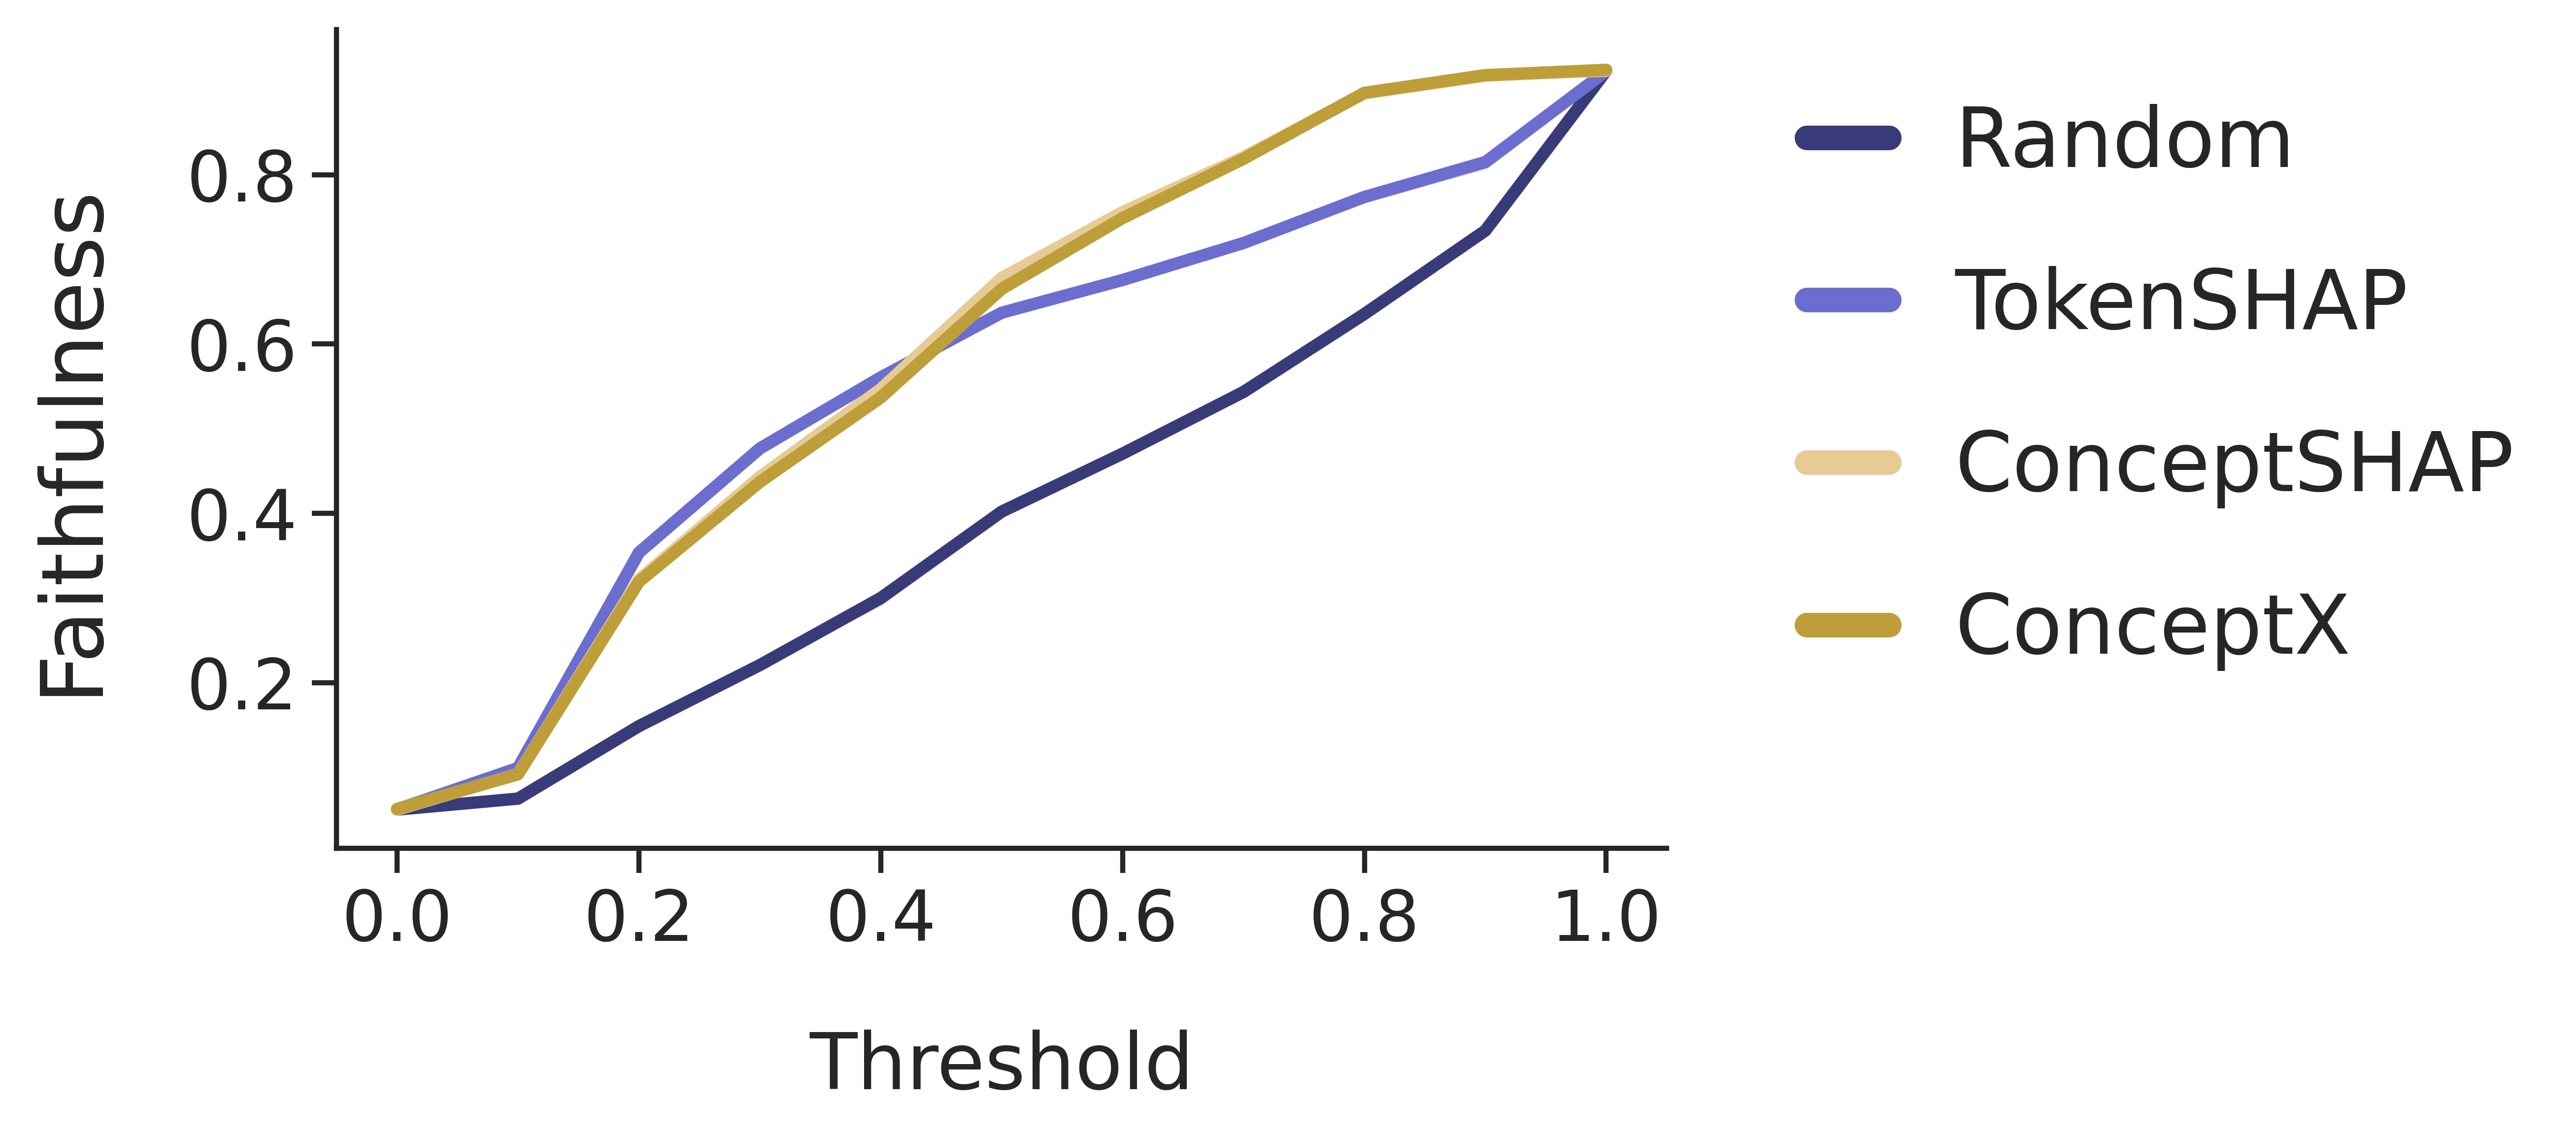

In [16]:
df = df_


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)

# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer", "seed"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

df = df.drop(columns=["id", "input"])
df = df.groupby(["explainer", "threshold", "seed"]).mean().reset_index()
print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 17, "ytick.labelsize": 17})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=3, errorbar='sd'
)

plt.xlabel('Threshold', fontsize=19, labelpad=18)  # Increase space between axis label and ticks
plt.ylabel('Faithfulness', fontsize=21, labelpad=18)  # Increase space between axis label and ticks
#plt.ylim(0.18,0.3)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
if dataset == "alpaca":
    ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
    ordered_labels = [label for label in legend_order_alpaca]
elif dataset in ["sst2", "sentiment"]:
    ordered_handles = [handles[labels.index(label)] for label in legend_order_sentiment]
    ordered_labels = [label for label in legend_order_sentiment]
else:
    ordered_handles = [handles[labels.index(label)] for label in legend_order]
    ordered_labels = [label for label in legend_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=20, frameon=False,
    handlelength=1, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(6)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()